<a href="https://colab.research.google.com/github/mordormordormordor/CS120-Open-Source/blob/main/CSYS%20assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

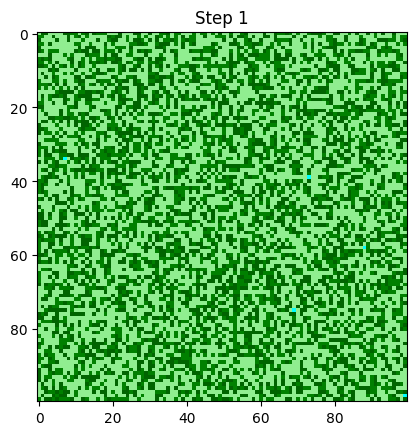

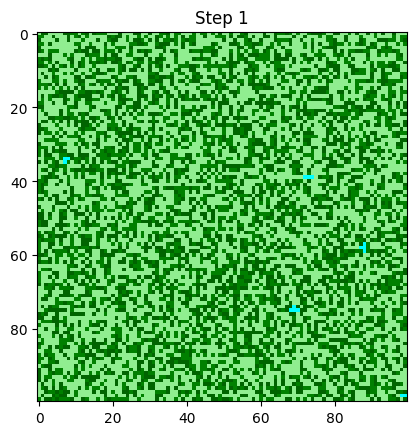

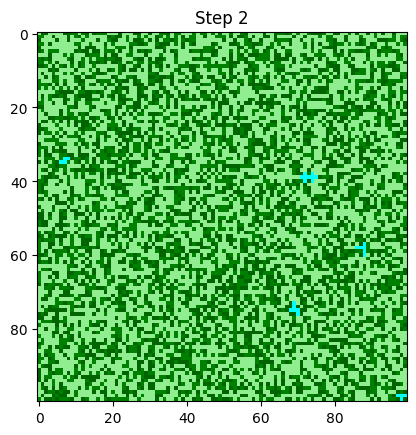

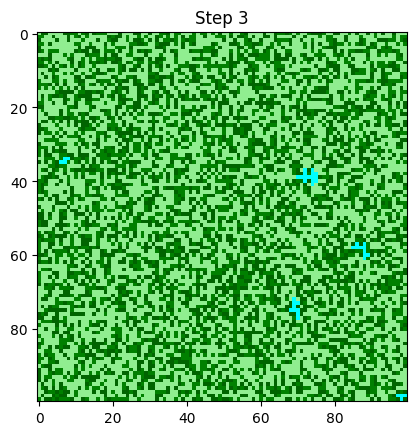

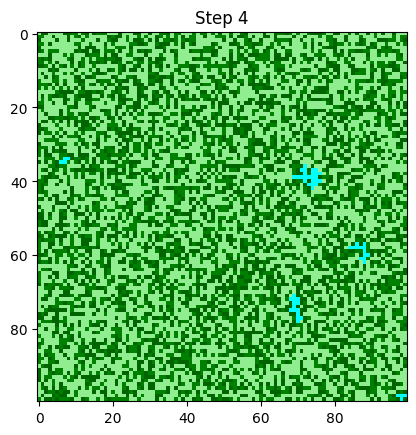

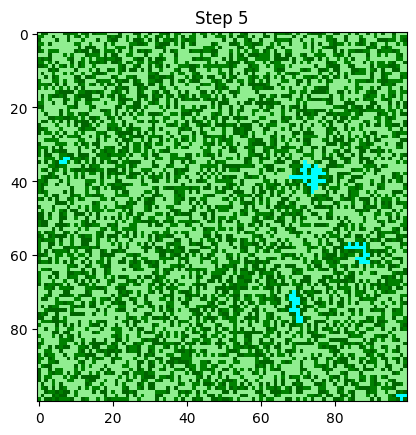

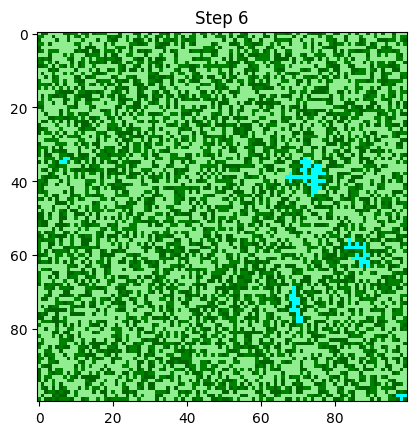

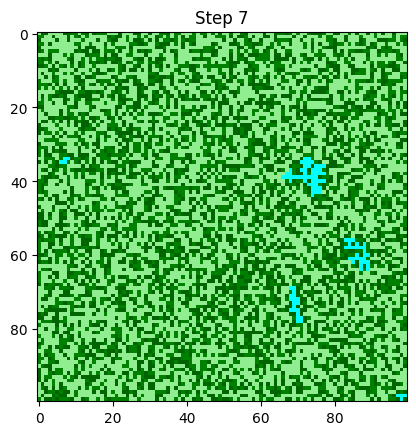

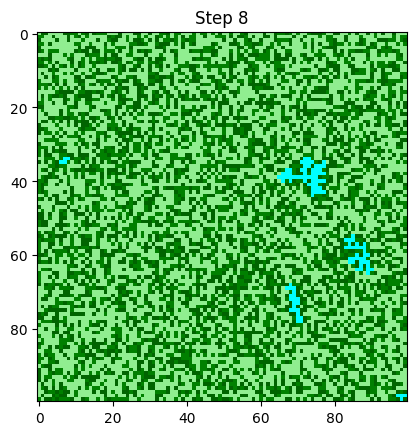

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x7e1f914e39a0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 61, in _cb
    callback(self)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py", line 254, in _remove_proxy
    del self.callbacks[signal][cid]
KeyError: 'changed'


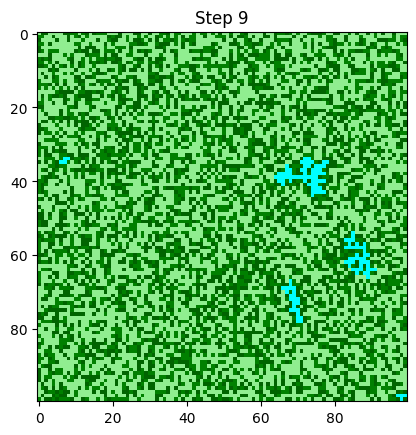

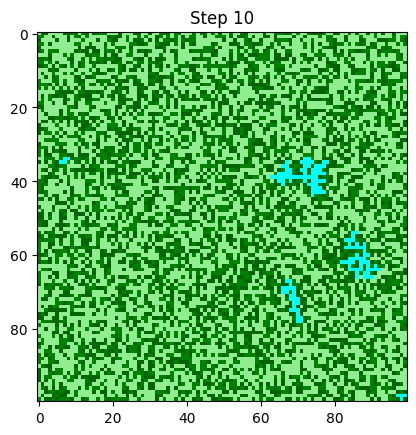

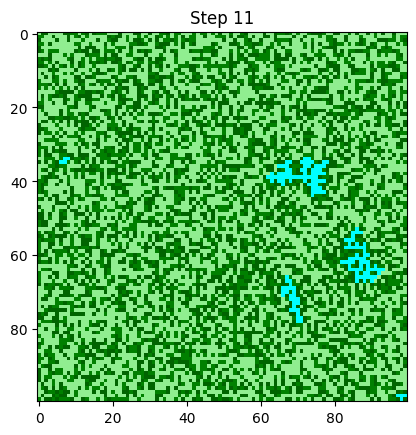

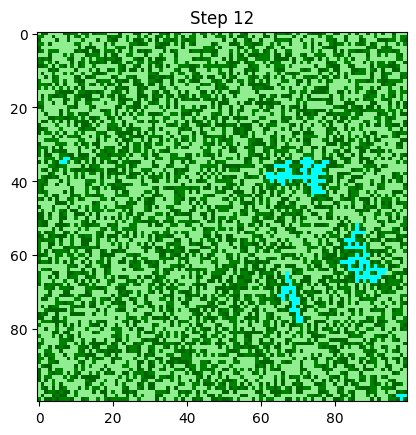

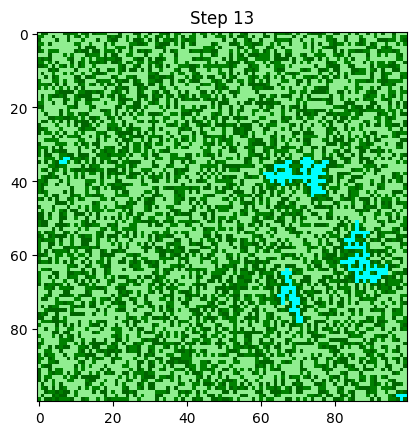

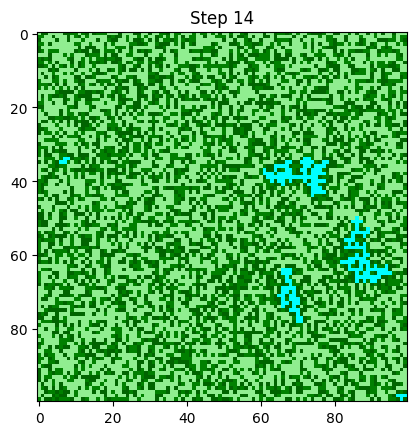

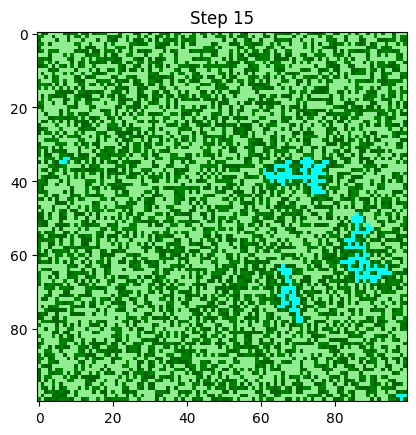

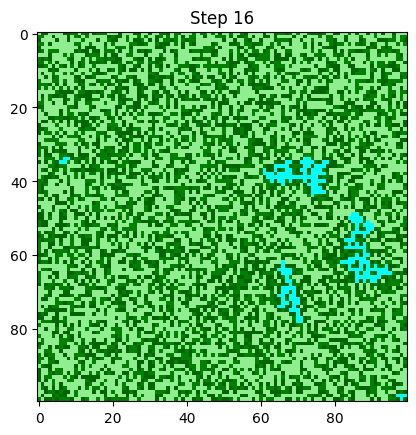

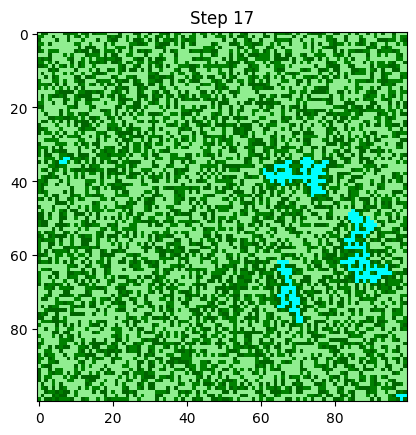

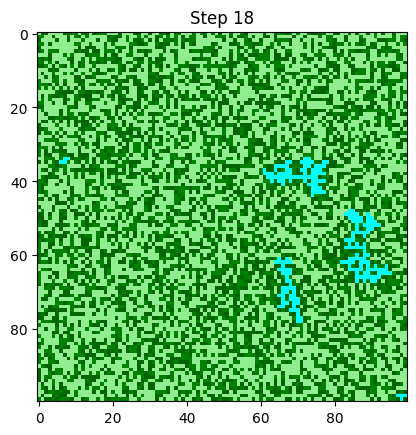

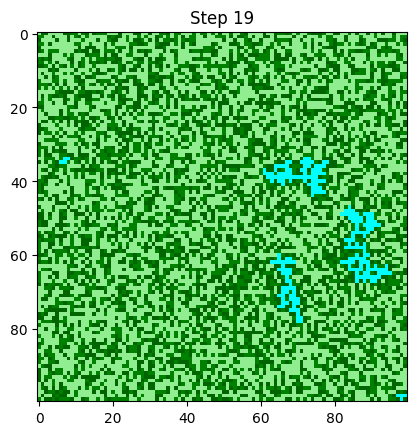

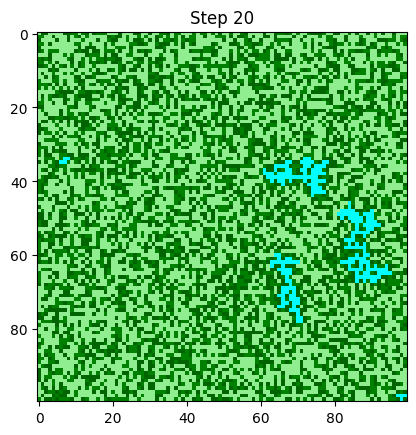

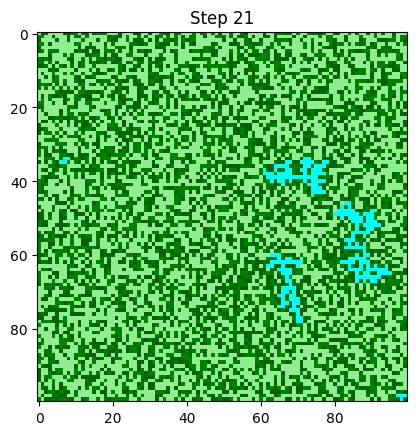

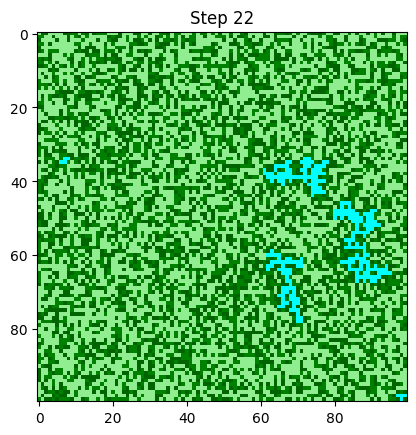

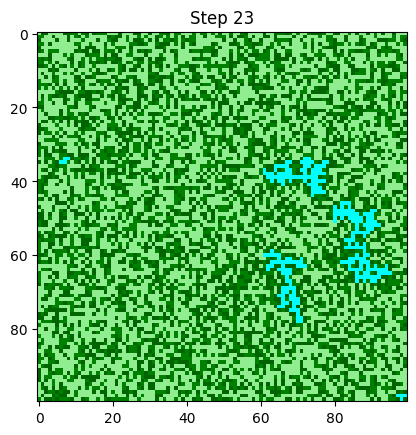

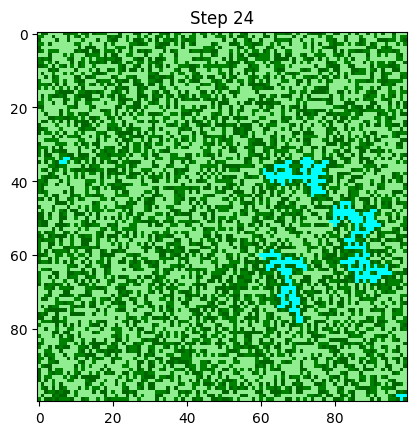

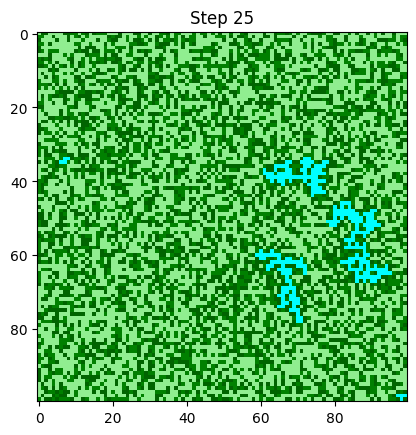

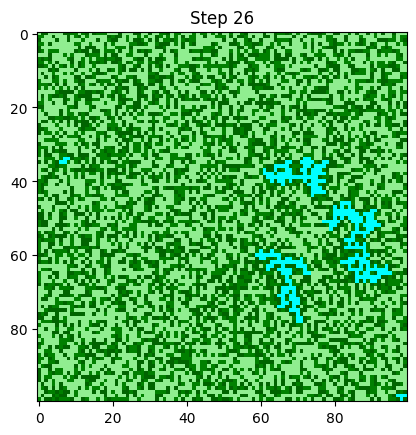

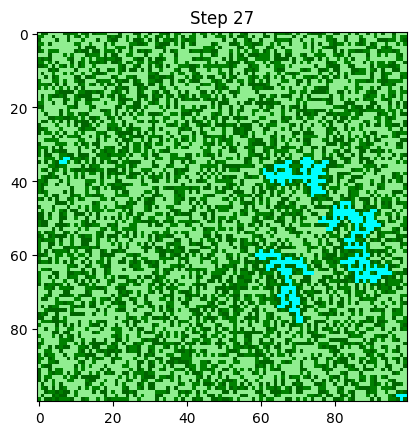

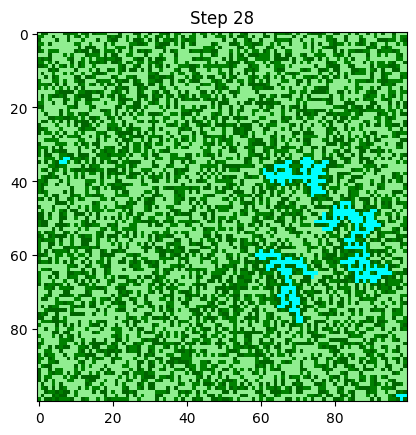

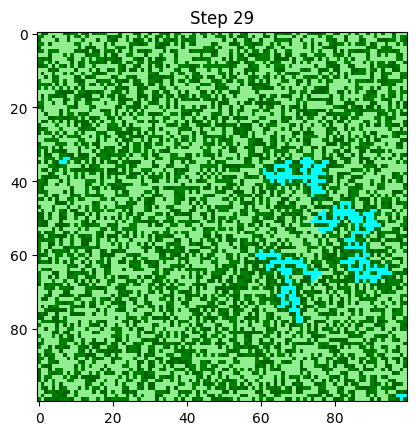

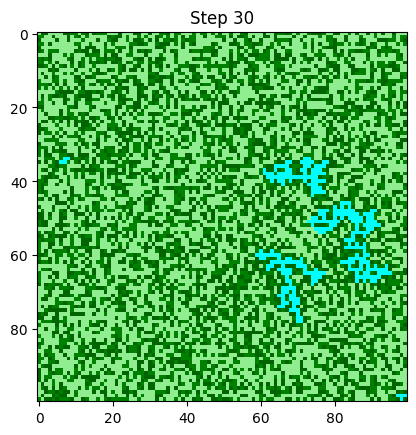

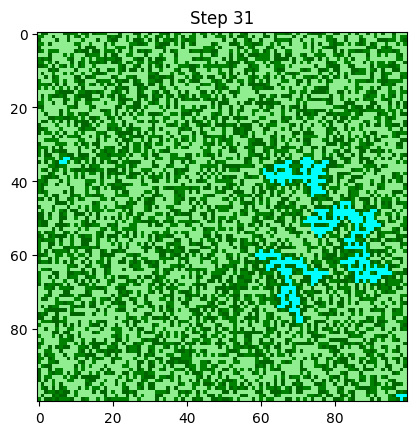

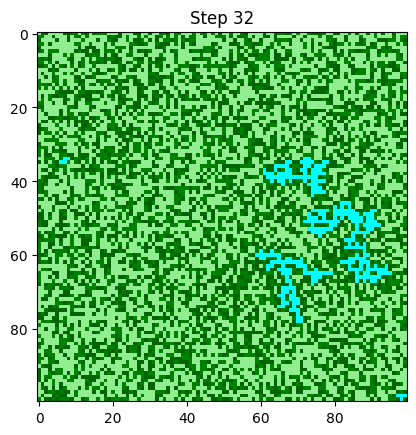

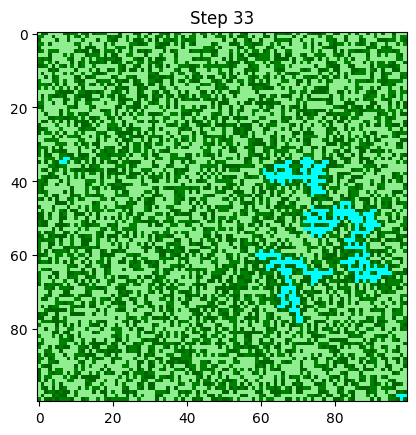

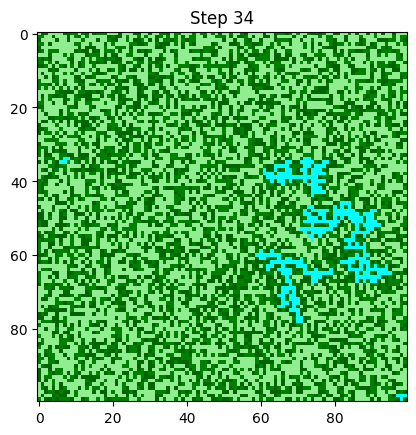

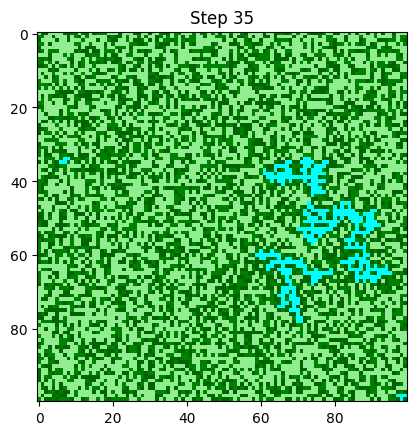

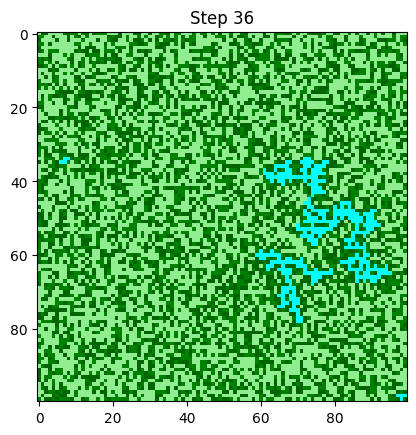

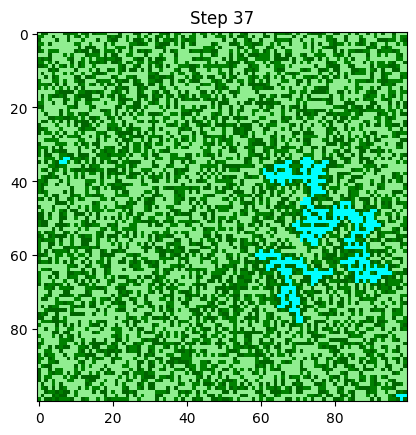

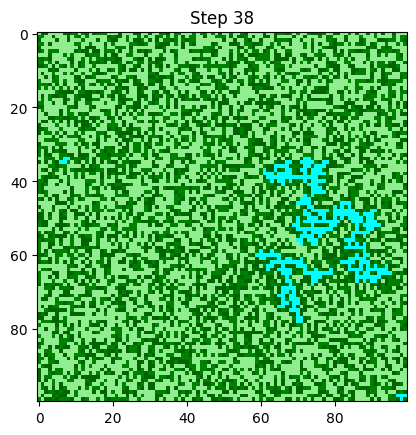

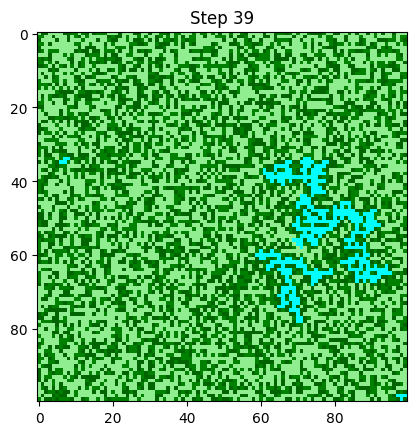

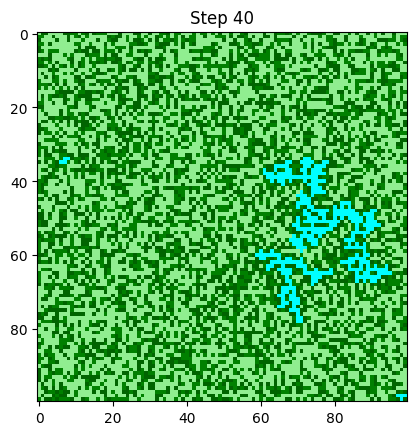

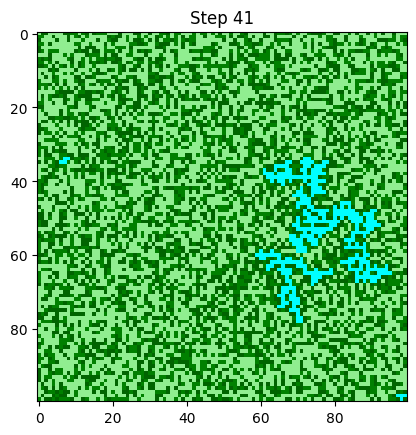

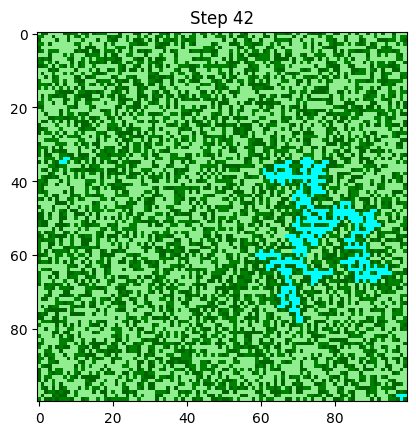

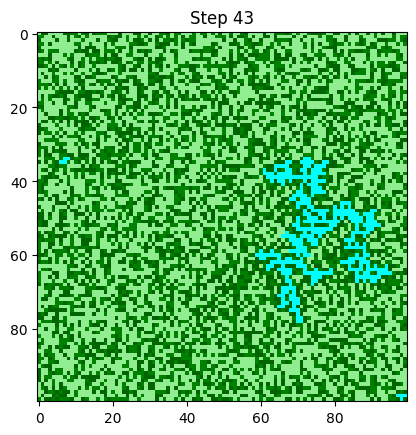

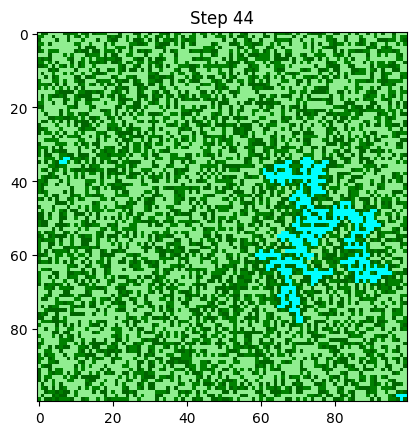

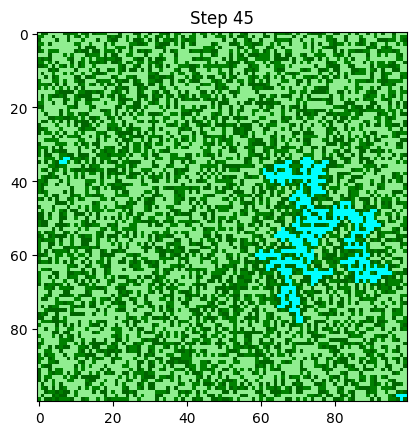

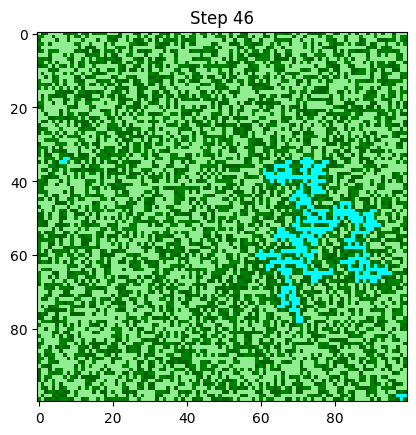

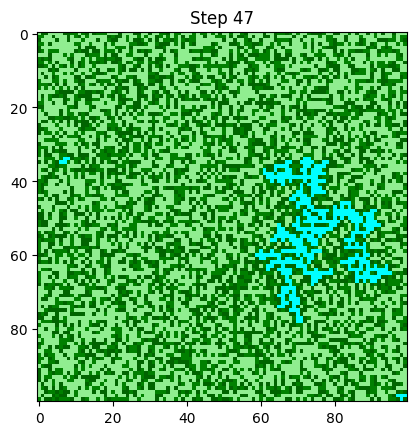

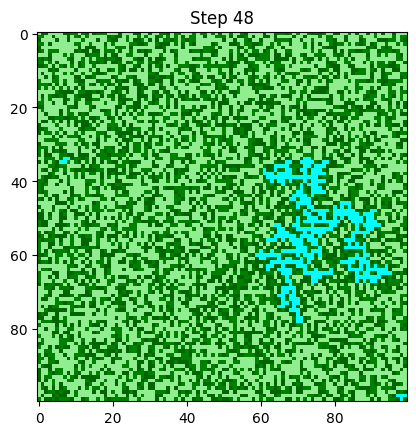

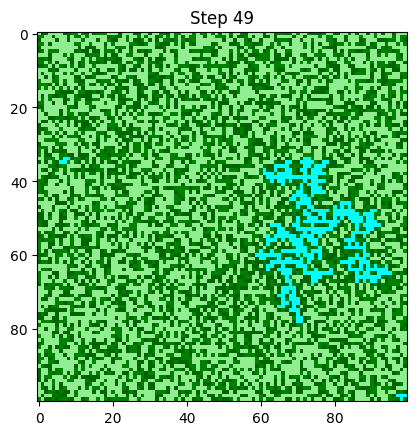

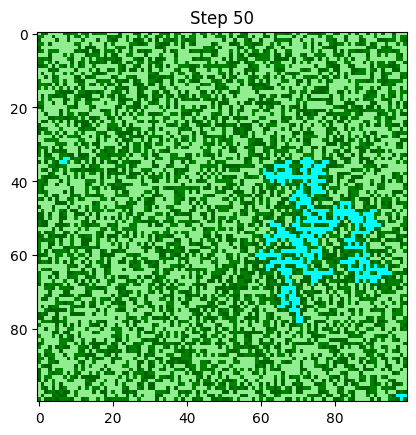

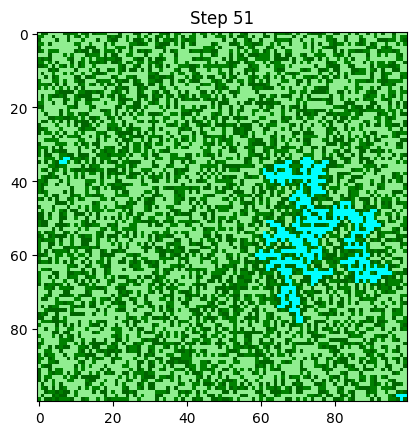

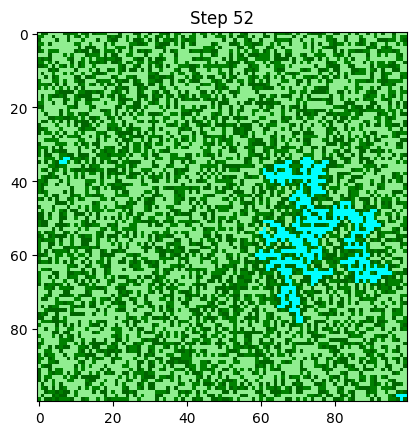

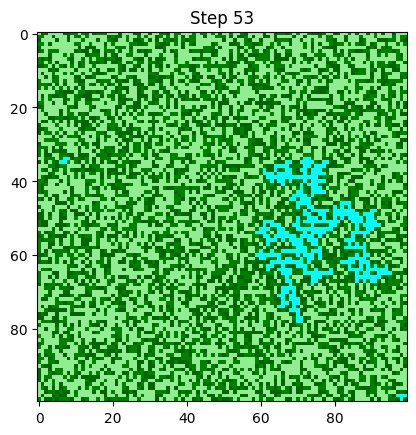

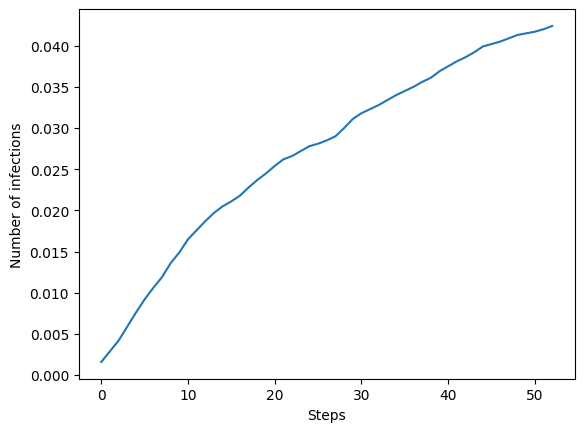

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.colors as mcolors

# Generates a randomized grid with three types of trees
# Arguments: size of the grid, percentage of grid dedicated to each tree
# Returns: 2D array representing our forest
def create_forest_grid(size, perc_tree1, perc_tree2, perc_tree3):

    # Calculate the total number of cells
    total_cells = size[0] * size[1]

    # Calculate the number of cells for each tree type
    num_tree1 = int(total_cells * perc_tree1)
    num_tree2 = int(total_cells * perc_tree2)
    num_tree3 = total_cells - num_tree1 - num_tree2  # Remainder for tree type 3

    # Create a 1D array with the tree types and shuffle it
    forest = np.array([1] * num_tree1 + [2] * num_tree2 + [3] * num_tree3)
    np.random.shuffle(forest)

    # Reshape it to the grid size
    forest_grid = forest.reshape(size)

    return forest_grid

# Updates the grid based on type of tree and infection rate
# Arguments: Input grid, infection probability for each tree
def update_infection(grid, infection_grid, prob_infect_tree1, prob_infect_tree2, prob_infect_tree3):

    rows, cols = grid.shape
    new_infections = np.zeros_like(grid)

    for i in range(rows):
        for j in range(cols):
            if infection_grid[i, j] == 1:  # If tree is already infected, continue spreading
                neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
                for ni, nj in neighbors:
                    if 0 <= ni < rows and 0 <= nj < cols and infection_grid[ni, nj] == 0:
                        # Determine the infection probability based on the tree type
                        tree_type = grid[ni, nj]
                        if tree_type == 1 and random.random() < prob_infect_tree1:
                            new_infections[ni, nj] = 1
                        elif tree_type == 2 and random.random() < prob_infect_tree2:
                            new_infections[ni, nj] = 1
                        elif tree_type == 3 and random.random() < prob_infect_tree3:
                            new_infections[ni, nj] = 1

    # Return updated infection grid
    # Updates the infection grid by merging new infections into the existing infection states.
    return np.maximum(infection_grid, new_infections)

# Visualizes current state of our forest
# Trees in gree, infected trees in blue
def visualize_infection(grid, infection_grid, step, cmap, norm):

    fig, ax = plt.subplots()

    # Create a visualization grid (trees + infections)
    vis_grid = grid.copy()
    vis_grid[infection_grid == 1] = 4  # Infected trees are marked with 4

    # Plot the grid
    ax.imshow(vis_grid, cmap=cmap, norm=norm)
    ax.set_title(f'Step {step+1}')
    plt.pause(0.5)  # Pause to update the plot for visualization
    plt.close(fig)


def count_infections(infection_grid):
    count = 0;
    rows, cols = infection_grid.shape
    for i in range(rows):
      for j in range(cols):
        if infection_grid[i, j] == 1:
          count += 1
    return count

def graph_infections(number_infections):
    plt.plot(number_infections)
    plt.xlabel('Steps')
    plt.ylabel('Number of infections')

# Simulates the spread of disease in our forest
# Arguments: initial grid, initial infected, and probabilities of infection
def spread_disease_visual(grid, infected_count, prob_infect_tree1, prob_infect_tree2, prob_infect_tree3, steps=10):

    # Get the grid dimensions
    rows, cols = grid.shape

    # Infection grid where 1 represents infected trees
    infection_grid = np.zeros_like(grid)

    # Infect initial random trees
    for _ in range(infected_count):
        while True:
            x, y = random.randint(0, rows-1), random.randint(0, cols-1)
            if infection_grid[x, y] == 0:  # Ensure not re-infecting
                infection_grid[x, y] = 1
                break

    # Set up color mapping for visualization
    cmap = mcolors.ListedColormap(['white', 'lightgreen', 'green', 'darkgreen', 'cyan'])
    bounds = [0, 1, 2, 3, 4, 5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    visualize_infection(grid, infection_grid, 0, cmap, norm)
    number_infections = []

    # Simulation loop with visualization
    for step in range(steps):
        # Update infection grid
        new_infection_grid = update_infection(grid, infection_grid, prob_infect_tree1, prob_infect_tree2, prob_infect_tree3)

        # End simulation if no change to infection grid occured
        # (only when probability of infection is 100%)
        if np.array_equal(new_infection_grid, infection_grid):  # Stop if no cells have changed
            break
        infection_grid = new_infection_grid

        # Visualize the current state
        visualize_infection(grid, infection_grid, step, cmap, norm)

        # Count number of infections each iteration
        number_infections.append(count_infections(infection_grid)/10000)

    graph_infections(number_infections)

    return infection_grid



# Parameters
forest_size = (100, 100)
perc_tree1 = 0.51
perc_tree2 = 0.24
perc_tree3 = 0.25

# Create the forest grid
forest = create_forest_grid(forest_size, perc_tree1, perc_tree2, perc_tree3)

# Simulate and visualize the disease spread
infected_forest = spread_disease_visual(forest, infected_count = 5, prob_infect_tree1 = 1.0,
                                        prob_infect_tree2 = 0.0, prob_infect_tree3 = 0.0, steps=100)


